### Toy Dataset

Toy dataset consists of three possible paritions: (i) inliers (ii) outliers (iii) novelties. 

The data-generator consists of exactly three corresponsing generators: (i)`inlier_generator`, (ii) `outlier_generator` and finally (iii) `novelty_generator`. Since the main topic of this work is price/cost estimation and it is a supervised problem, it demands generation of both features and target. In *class* `DataGenerator` we have considered two types of features:
1. Numeric
2. Categorical
Numeric features are generated by single or multivariate Gaussian processes and Categorical features (e.g. type, material, ...) are generated with integer generateor (what is the underlying process?). The target can be any conditional and algebric function of features depending on the complexity of the problem. To make the target more general, we define $N$-order polynomial of combination of numerical target and sum of step functions for categorical features. 

To make it clear, let us take a $X$-matrix with $M$ number of features and $N$ number of datapoints. To generate a target of 
$$ y = f(X) = f(x1, x2, \ldots, x_M)$$
with degree of $l$ we would have
$$ y = a_1 x_1 + \ldots + a_M x_M + \ldots + a^2_1 x_1 x_2 + \ldots a^l_1 x_1 x_2 \ldots x_M $$
that many coeficients $a_i^j$ can be zero.

In [2]:
import sys
sys.path.append('../src/')
from data_generator import ToyDataGenerator

In [3]:
n_samples = 300
n_features = 3
outliers_fraction = 0.15
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers

In [4]:
dgenerator = ToyDataGenerator(n_inliers, n_features)

In [5]:
X = dgenerator.feature_generator()
y = dgenerator.target_generator_independent(X, n_features)

Coefficients are []
indeces are []
Coefficients are [-1]
indeces are [2]
Coefficients are [-2 -1]
indeces are [1 0]


In [6]:
X_outlier, y_outlier = dgenerator.outlier_generator(X, y)

In [7]:
import matplotlib.pyplot as pl

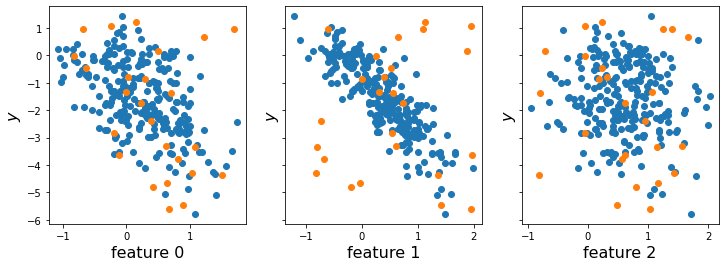

In [8]:
fig, ax = pl.subplots(1, X.shape[1], figsize=(4*X.shape[1],4), sharey=True)
for i in range(X.shape[1]):
    ax[i].scatter(X[:,i], y)
    ax[i].scatter(X_outlier[:,i], y_outlier)
    ax[i].set_xlabel(f'feature {i}', fontsize=16)
    ax[i].set_ylabel(r'$y$', fontsize=16)